<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_common_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to Find the Most Discussed countries.
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata

    </font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata

<br>
<font size="3"> 
    
After installing and importing everything we need, we will write the functions that we will use in this project.
    
- **removeAccents:** removes all accents from the given string
- **normalize:** keeps only small greek letters
- **plot_barchart:** plots the given dictionary in a bar chart 

</font>
<br>
<br>

In [ ]:
#make all small function
def removeAccents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return (u"".join([c for c in nfkd_form if not unicodedata.combining(c)])).lower()

#keep all small words
def normalize (i):
    all_small = removeAccents(i)
    split_to_tokens = re.findall(r'[α-ω]+',all_small)
    return(split_to_tokens)

#function to print output from a given dictionary
def plot_barchart(mydict):
    source = []
    count = []

    for w in sorted(mydict, key=mydict.get, reverse=True):
        source.append(w)
        count.append(mydict[w])

    plt.figure(figsize=(20, 5))
    plt.bar(source[0:10], count[0:10])
    plt.title('Bar chart for 10 most popular Countries')
    plt.grid(axis='y')
    plt.show() 

<br>
<font size="3">
After installing and importing everything we need, we will read our data from the output.csv file. We will then create a dictionary with the countries and we will find the most popular ones in the greek journalism.
</font>
<br>
<br>

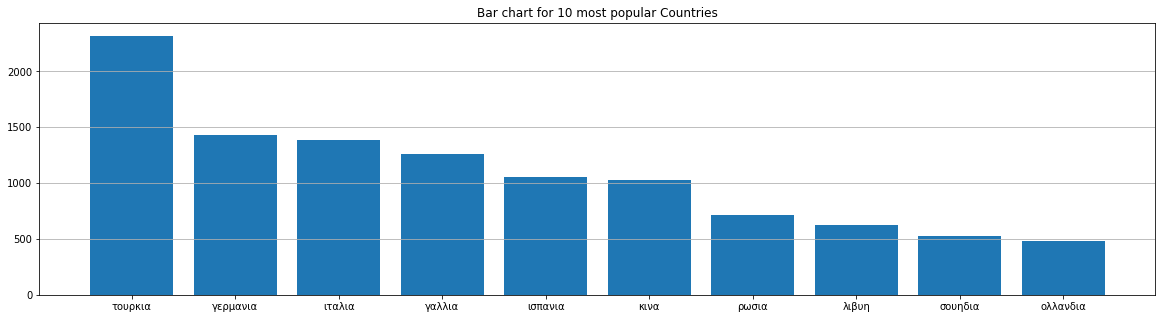

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#create a list with all the countries
countries_list = ["Κίνα", "Ινδία", "ΗΠΑ", "Ινδονησία", "Κίνα", "Ινδία", "ΗΠΑ", "Ινδονησία", "Πακιστάν", "Βραζιλία", "Νιγηρία", "Μπανγκλαντές", "Ρωσία", "Μεξικό", "Ιαπωνία", "Αιθιοπία", "Φιλιππίνες", "Αίγυπτος", "Βιετνάμ", "Λαϊκή Δημοκρατία του Κονγκό ", "Ιράν", "Τουρκία", "Γερμανία", "Ηνωμένο Βασίλειο", "Ταϊλάνδη", "Γαλλία", "Ιταλία", "Νότια Αφρική", "Τανζανία", "Μιανμάρ", "Νότια Κορέα", "Κολομβία", "Κένυα", "Ισπανία", "Αργεντινή", "Αλγερία", "Σουδάν", "Ουκρανία", "Ουγκάντα", "Ιράκ", "Πολωνία", "Καναδάς", "Μαρόκο", "Σαουδική Αραβία", "Ουζμπεκιστάν", "Αφγανιστάν", "Μαλαισία", "Περού", "Βενεζουέλα", "Ανγκόλα", "Γκάνα", "Μοζαμβίκη", "Νεπάλ", "Υεμένη", "Καμερούν", "Ακτή Ελεφαντοστού ", "Μαδαγασκάρη", "Βόρεια Κορέα", "Αυστραλία", "Ταϊβάν ", "Νίγηρας", "Σρι Λάνκα", "Μπουρκίνα Φάσο", "Μάλι", "Χιλή", "Ρουμανία", "Καζακστάν", "Ζάμπια", "Μαλάουι", "Ισημερινός", "Συρία", "Ολλανδία", "Γουατεμάλα", "Καμπότζη", "Σενεγάλη", "Τσαντ", "Σομαλία", "Ζιμπάμπουε", "Ρουάντα", "Γουινέα", "Μπενίν", "Αϊτή", "Τυνησία", "Βολιβία", "Βέλγιο", "Μπουρούντι", "Νότιο Σουδάν", "Κούβα", "Τσεχία", "Ιορδανία", "Δομινικανή Δημοκρατία", "Σουηδία", "Πορτογαλία", "Αζερμπαϊτζάν", "Ηνωμένα Αραβικά Εμιράτα", "Ουγγαρία", "Λευκορωσία", "Τατζικιστάν", "Ονδούρα", "Ισραήλ", "Παπούα Νέα Γουινέα", "Αυστρία", "Ελβετία", "Σιέρα Λεόνε", "Τόγκο", "Χονγκ Κονγκ", "Λάος", "Παραγουάη", "Βουλγαρία", "Σερβία", "Λιβύη", "Λίβανος", "Νικαράγουα", "Κιργιζία", "Ελ Σαλβαδόρ", "Τουρκμενιστάν", "Δανία", "Σιγκαπούρη", "Φινλανδία", "Δημοκρατία του Κονγκό", "Σλοβακία", "Νορβηγία ", "Κόστα Ρίκα", "Λιβερία", "Κράτος της Παλαιστίνης", "Νέα Ζηλανδία", "Ιρλανδία", "Κεντροαφρικανική Δημοκρατία ", "Κουβέιτ", "Ομάν", "Παναμάς", "Μαυριτανία", "Κροατία", "Γεωργία", "Ερυθραία", "Ουρουγουάη", "Μογγολία", "Βοσνία και Ερζεγοβίνη", "Πουέρτο Ρίκο", "Αρμενία", "Αλβανία", "Λιθουανία", "Κατάρ", "Τζαμάικα", "Μολδαβία", "Ναμίμπια", "Γκάμπια", "Μποτσουάνα", "Γκαμπόν", "Λεσότο", "Σλοβενία", "Βόρεια Μακεδονία", "Λετονία", "Κόσοβο", "Μπαχρέιν", "Γουινέα-Μπισσάου", "Ισημερινή Γουινέα", "Τρινιντάντ και Τομπάγκο ", "Εσθονία", "Ανατολικό Τιμόρ", "Μαυρίκιος ", "Εσουατίνι", "Τζιμπουτί", "Κομόρες ", "Φίτζι", "Κύπρος", "Ρεϊνιόν", "Γουιάνα", "Μπουτάν", "Νήσοι Σολομώντα", "Μακάο", "Λουξεμβούργο", "Μαυροβούνιο", "Δυτική Σαχάρα", "Σουρινάμ", "Πράσινο Ακρωτήριο", "Μάλτα", "Υπερδνειστερία", "Μπρουνέι", "Μπελίζ", "Μπαχάμες", "Μαλδίβες", "Γουαδελούπη", "Ισλανδία", "Μαρτινίκα", "Γαλλική Γουιάνα", "Μαγιότ", "Γαλλική Πολυνησία", "Μπαρμπάντος", "Βανουάτου", "Νέα Καληδονία", "Αμπχαζία", "Σάο Τομέ και Πρίνσιπε", "Σαμόα", "Αγία Λουκία", "Γκουάμ", "Κουρασάο", "Αρούμπα", "Γρενάδα", "Άγιος Βικέντιος και Γρεναδίνες ", "Κιριμπάτι", "Τζέρσεϊ", "Αμερικανικές Παρθένοι Νήσοι", "Μικρονησία", "Τόνγκα", "Σεϋχέλλες", "Αντίγκουα και Μπαρμπούντα", "Νήσος του Μαν", "Ανδόρρα", "Δομινίκα", "Κέιμαν Νήσοι", "Βερμούδες", "Γκέρνσεϊ", "Γροιλανδία", "Αμερικανική Σαμόα", "Βόρειες Μαριάνες Νήσοι", "Νότια Οσσετία", "Νήσοι Μάρσαλ", "Άγιος Χριστόφορος και Νέβις", "Νήσοι Φερόες", "Τερκς και Κέικος", "Άγιος Μαρτίνος (Ολλανδία)", "Λίχτενσταϊν", "Μονακό", "Άγιος Μαρτίνος (Γαλλία)", "Γιβραλτάρ", "Άγιος Μαρίνος", "Βρετανικές Παρθένοι Νήσοι", "Παλάου", "Νήσοι Κουκ", "Ανγκουίλα", "Ουαλίς και Φουτουνά", "Τουβαλού", "Ναουρού", "Άγιος Βαρθολομαίος", "Σαιν Πιερ και Μικελόν", "Αγία Ελένη, Ασενσιόν και Τριστάν ντα Κούνια ", "Μοντσερράτ", "Νήσοι Φώκλαντ", "Νήσος των Χριστουγέννων", "Νησί Νόρφολκ", "Νιούε", "Τοκελάου", "Βατικανό", "Νησιά Κόκος"]

#normalize the countries list
normal_list = []

for x in countries_list:   
    all_in_one_string = " "
    temp = normalize(x)
    all_in_one_string = temp[0]
    for y in temp[1:]:
        all_in_one_string = all_in_one_string + " " + y
    normal_list.append(all_in_one_string)

#create a countries dict with key the countries name and value zero
countries_dict = {k:0 for k in normal_list}

    
for x in df['article_body']:
    #get a the article splitted by words in a list
    article = x
    article_list = x.split()
    #rotate over each dict key and count the times it is appeared
    for y in countries_dict:
        res = re.search(rf"\b(?=\w){y}(?!\w)", article, re.IGNORECASE)
        if res != None:
            count = countries_dict[y]+1
            countries_dict.update({y:count}) 

plot_barchart(countries_dict)